In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


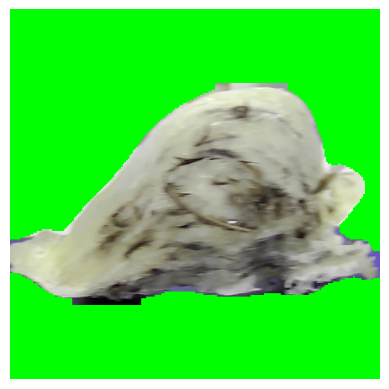

In [6]:
# prompt: file yang dibaca bertipe png

from google.colab import drive
drive.mount('/content/drive')

# Now you can access files in your Google Drive.
# Example: Read a PNG image file and display it using matplotlib.

from PIL import Image
import matplotlib.pyplot as plt
import os

# Replace 'your_png_file.png' with the actual path to your PNG file in Google Drive.
image_path = '/content/drive/MyDrive/kuliah math industri/_BB_kategori_IMG17225709061576 - Copy - Copy (1).png'

try:
  img = Image.open(image_path)
  plt.imshow(img)
  plt.axis('off') # Hide axis ticks and labels
  plt.show()
except FileNotFoundError:
  print(f"Error: File not found at {image_path}")
except Exception as e:
  print(f"An error occurred: {e}")

# Alternative method to check if the file exists before attempting to open it.
# if os.path.exists(image_path):
#   img = Image.open(image_path)
#   plt.imshow(img)
#   plt.axis('off') # Hide axis ticks and labels
#   plt.show()
# else:
#   print(f"Error: File not found at {image_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


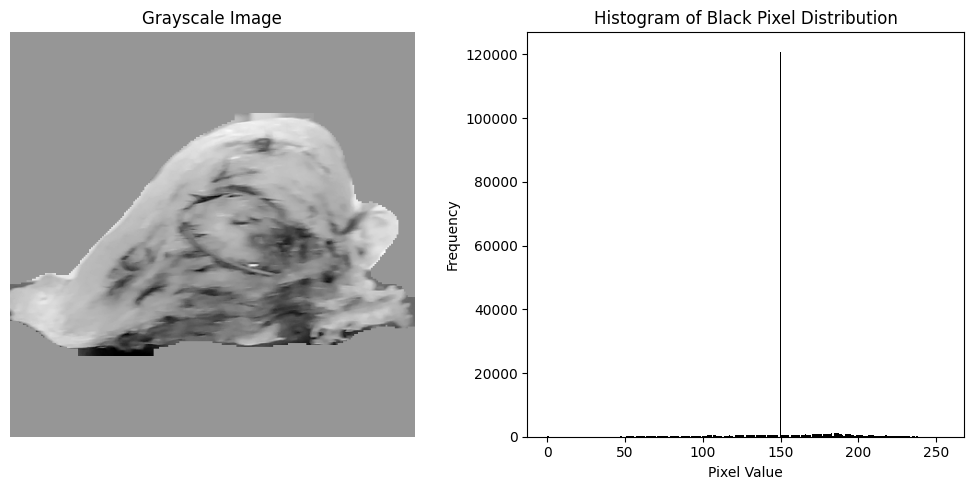

In [7]:
# prompt: Konversi ke grayscale dan hitung serta berikan gambar histogram distribusi pixel hitam pada gambar dan visualisasikan

from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

drive.mount('/content/drive')

# Replace 'your_png_file.png' with the actual path to your PNG file in Google Drive.
image_path = '/content/drive/MyDrive/kuliah math industri/_BB_kategori_IMG17225709061576 - Copy - Copy (1).png'

try:
    img = Image.open(image_path).convert('L') # Convert to grayscale
    img_array = np.array(img)

    # Calculate and display the histogram
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.hist(img_array.flatten(), bins=256, range=(0, 255), color='black')
    plt.title('Histogram of Black Pixel Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: File not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

In [8]:
# prompt: tampilkan semua gambar dan Konversi ke grayscale dan hitung serta berikan gambar distribusi pixel hitam pada gambar dan visualisasikan

import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

def process_images_in_directory(directory_path):
    """
    Processes all images in the specified directory._

    Args:
        directory_path: The path to the directory containing the images.
    """

    for filename in os.listdir(directory_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Add more extensions if needed
            image_path = os.path.join(directory_path, filename)
            try:
                img = Image.open(image_path).convert('L')  # Convert to grayscale
                img_array = np.array(img)

                # Calculate and display the histogram
                plt.figure(figsize=(10, 5))

                plt.subplot(1, 2, 1)
                plt.imshow(img, cmap='gray')
                plt.title(f'Grayscale Image: {filename}')
                plt.axis('off')

                plt.subplot(1, 2, 2)
                plt.hist(img_array.flatten(), bins=256, range=(0, 255), color='black')
                plt.title('Histogram of Black Pixel Distribution')
                plt.xlabel('Pixel Value')
                plt.ylabel('Frequency')

                plt.tight_layout()
                plt.show()

            except FileNotFoundError:
                print(f"Error: File not found at {image_path}")
            except Exception as e:
                print(f"An error occurred while processing {filename}: {e}")


# Example usage: rep/drive/MyDrive/kuliah math industri/SarangBurungWalet/BBlace with your Google Drive directory
directory_path = '/content'  # Replace with your directory
process_images_in_directory(directory_path)

<ipython-input-9-12bd7da15f4e>:36: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


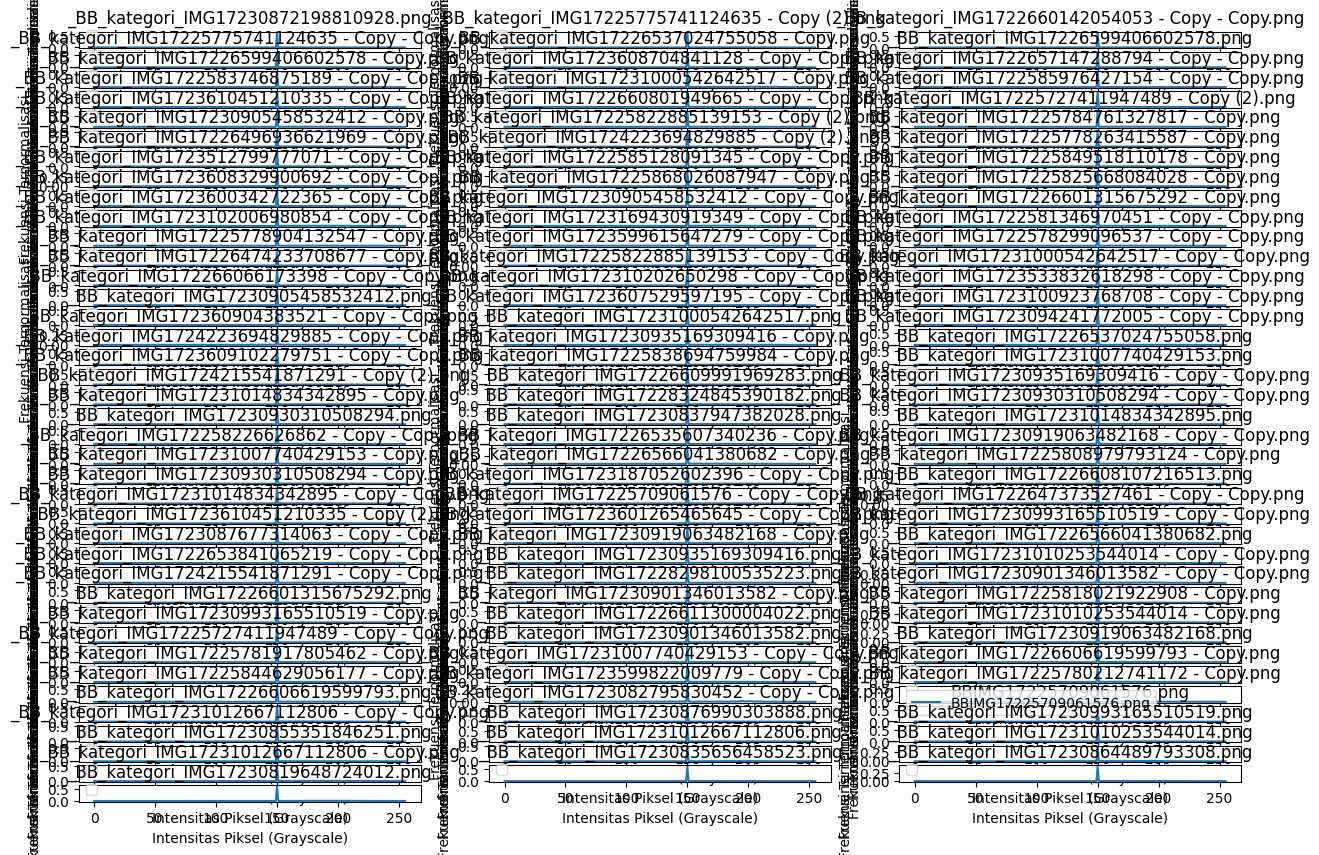

In [9]:
# prompt: kerjakan normalisasi distribusi setiap gambar pada folder '/content/drive/MyDrive/kuliah math industri/SarangBurungWalet/BB' dan gambarkan pada 1 layar

import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def calculate_normalized_grayscale_distribution(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Gambar tidak ditemukan pada path: {image_path}")
        return None

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist, _ = np.histogram(gray_image.flatten(), 256, [0, 256])
    normalized_hist = hist / np.sum(hist)
    return normalized_hist

folder_path = '/content/drive/MyDrive/kuliah math industri/SarangBurungWalet/BB'
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, image_file in enumerate(image_files):
    image_path = os.path.join(folder_path, image_file)
    distribution = calculate_normalized_grayscale_distribution(image_path)

    if distribution is not None:
        plt.subplot(len(image_files) // 3 + (1 if len(image_files) % 3 > 0 else 0), 3, i + 1)  # Adjust subplot grid as needed
        plt.plot(distribution, label=image_file)
        plt.title(image_file)
        plt.xlabel("Intensitas Piksel (Grayscale)")
        plt.ylabel("Frekuensi Ternormalisasi")
        plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# prompt: hitunglah jarak distribusi antara 2 gambar yang berbeda pada folder tersebut dan tuliskan hasil jarak pada tabel

import os
import cv2
import numpy as np
from scipy.spatial.distance import euclidean
import pandas as pd

def calculate_normalized_grayscale_distribution(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Gambar tidak ditemukan pada path: {image_path}")
        return None

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist, _ = np.histogram(gray_image.flatten(), 256, [0, 256])
    normalized_hist = hist / np.sum(hist)
    return normalized_hist

def calculate_distance_between_images(image1_path, image2_path):
    dist1 = calculate_normalized_grayscale_distribution(image1_path)
    dist2 = calculate_normalized_grayscale_distribution(image2_path)

    if dist1 is None or dist2 is None:
        return None

    return euclidean(dist1, dist2)

folder_path = '/content/drive/MyDrive/kuliah math industri/SarangBurungWalet/BB' # Ganti dengan path folder Anda
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

distances = []
for i in range(len(image_files)):
    for j in range(i + 1, len(image_files)):
        image1_path = os.path.join(folder_path, image_files[i])
        image2_path = os.path.join(folder_path, image_files[j])
        distance = calculate_distance_between_images(image1_path, image2_path)
        if distance is not None:
            distances.append([image_files[i], image_files[j], distance])

# Buat DataFrame pandas
df = pd.DataFrame(distances, columns=['Gambar 1', 'Gambar 2', 'Jarak'])
df

KeyboardInterrupt: 

In [12]:
# prompt: Gunakan metrik tambahan seperti EMD atau Bhattacharyya Distance dari tabel sebelumnya untuk memberikan perbedaan antar class (gambar pada folder ...BB,...BB2,...BR)

from scipy.stats import wasserstein_distance
import numpy as np

def calculate_bhattacharyya_distance(dist1, dist2):
    """Calculates the Bhattacharyya distance between two distributions."""
    return -np.log(np.sum(np.sqrt(dist1 * dist2)))

# ... (rest of your existing code) ...

def calculate_distance_between_images(image1_path, image2_path):
    dist1 = calculate_normalized_grayscale_distribution(image1_path)
    dist2 = calculate_normalized_grayscale_distribution(image2_path)

    if dist1 is None or dist2 is None:
        return None

    euclidean_distance = euclidean(dist1, dist2)
    emd_distance = wasserstein_distance(np.arange(len(dist1)), np.arange(len(dist2)), dist1, dist2)
    bhattacharyya_distance = calculate_bhattacharyya_distance(dist1, dist2)

    return euclidean_distance, emd_distance, bhattacharyya_distance

# ... (rest of your existing code) ...


folder_paths = [
    '/content/drive/MyDrive/kuliah math industri/SarangBurungWalet/BB',
    '/content/drive/MyDrive/kuliah math industri/SarangBurungWalet/BB2',
    '/content/drive/MyDrive/kuliah math industri/SarangBurungWalet/BBT'
]

all_distances = []

for folder_path in folder_paths:
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    for i in range(len(image_files)):
        for j in range(i + 1, len(image_files)):
            image1_path = os.path.join(folder_path, image_files[i])
            image2_path = os.path.join(folder_path, image_files[j])

            euclidean_dist, emd_dist, bhattacharyya_dist = calculate_distance_between_images(image1_path, image2_path)

            if euclidean_dist is not None:
              all_distances.append([folder_path, image_files[i], image_files[j], euclidean_dist, emd_dist, bhattacharyya_dist])

# Create a pandas DataFrame
df = pd.DataFrame(all_distances, columns=['Folder', 'Gambar 1', 'Gambar 2', 'Jarak Euclidean', 'EMD Distance', 'Bhattacharyya Distance'])
df

,Folder,Gambar 1,Gambar 2,Jarak Euclidean,EMD Distance,Bhattacharyya Distance
0,/content/drive/MyDrive/kuliah math industri/Sa...,_BB_kategori_IMG17230872198810928.png,_BB_kategori_IMG17225775741124635 - Copy (2).png,0.026555,2.202959,0.005566
1,/content/drive/MyDrive/kuliah math industri/Sa...,_BB_kategori_IMG17230872198810928.png,_BB_kategori_IMG1722660142054053 - Copy - Copy...,0.015690,4.630588,0.009693
2,/content/drive/MyDrive/kuliah math industri/Sa...,_BB_kategori_IMG17230872198810928.png,_BB_kategori_IMG17225775741124635 - Copy - Cop...,0.026555,2.202959,0.005566
3,/content/drive/MyDrive/kuliah math industri/Sa...,_BB_kategori_IMG17230872198810928.png,_BB_kategori_IMG17226537024755058 - Copy.png,0.112681,5.934979,0.018806
4,/content/drive/MyDrive/kuliah math industri/Sa...,_BB_kategori_IMG17230872198810928.png,_BB_kategori_IMG17226599406602578.png,0.089374,5.512177,0.018303
...,...,...,...,...,...,...
13696,/content/drive/MyDrive/kuliah math industri/Sa...,_BB_kategori_IMG1722582110986177.png,_BB_kategori_IMG1723100267296006.png,0.068531,3.147147,0.007374
13697,/content/drive/MyDrive/kuliah math industri/Sa...,_BB_kategori_IMG1722582110986177.png,_BB_kategori_IMG1722935072492269.png,0.092589,3.801201,0.011133
13698,/content/drive/MyDrive/kuliah math industri/Sa...,_BB_kategori_IMG1722937434426716.png,_BB_kategori_IMG1723100267296006.png,0.011711,1.034231,0.004790
13699,/content/drive/MyDrive/kuliah math industri/Sa...,_BB_kategori_IMG1722937434426716.png,_BB_kategori_IMG1722935072492269.png,0.019551,1.445899,0.006263


In [11]:
# prompt: buatkan pola dari hasil diatas

import pandas as pd

# Assuming 'df' is the DataFrame created in your previous code
# Create a pivot table to show the distances between images

pivot_table = pd.pivot_table(df, values='Jarak Euclidean', index='Gambar 1', columns='Gambar 2')

# Display the pivot table
print(pivot_table)

# Example using heatmap for visualization (requires seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(pivot_table, annot=True, cmap='viridis')  # Use a colormap of your choice
plt.title('Jarak Euclidean Antar Gambar')
plt.show()


# Calculate average distance for each image
average_distances = df.groupby('Gambar 1')['Jarak Euclidean'].mean()

# Display the average distances
print("\nRata-rata Jarak Euclidean per Gambar:")
print(average_distances)

# Find the most similar and dissimilar pairs of images
min_distance = df['Jarak Euclidean'].min()
max_distance = df['Jarak Euclidean'].max()

most_similar = df[df['Jarak Euclidean'] == min_distance]
most_dissimilar = df[df['Jarak Euclidean'] == max_distance]

print("\nPasangan Gambar Paling Mirip:")
print(most_similar)

print("\nPasangan Gambar Paling Tidak Mirip:")
most_dissimilar

NameError: name 'df' is not defined